In [135]:
using Plots, ProgressMeter
include("../sylow_double_cosets.jl")

stationary_distribution

In [ ]:
p = 11
k = 5
reps = p^2
n_samples = 10000

10000

In [137]:
samples = zeros(Int, n_samples, reps)
@showprogress for i in 1:n_samples
    _, sizes = sylow_burnside(p, k, reps)
    samples[i, 1:reps] = sizes
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


In [138]:
vals = collect(1:2*k)
emperical_dist_ = sum(samples .== reshape(vals, 1, 1, :), dims = 1)./n_samples
emperical_dist = dropdims(emperical_dist_, dims=1)
stationary_dist = stationary_distribution(p, k)
TV = sum(abs.(emperical_dist .- reshape(stationary_dist,1,:)), dims = 2)/2
ts = 1:reps
approx_TV = @. 1 - (1 - (1 - 1/p)^(ts - 1)) ^ k

50-element Vector{Float64}:
 1.0
 0.8571428571428572
 0.7346938775510206
 0.6297376093294462
 0.5397750937109539
 0.4626643660379606
 0.39656945660396614
 0.339916677089114
 0.2913571517906691
 0.24973470153485922
 ⋮
 0.0017996233734999256
 0.001542534320142841
 0.0013221722744081177
 0.0011332905209212596
 0.0009713918750753336
 0.0008326216072074288
 0.0007136756633207009
 0.0006117219971319976
 0.0005243331403989027

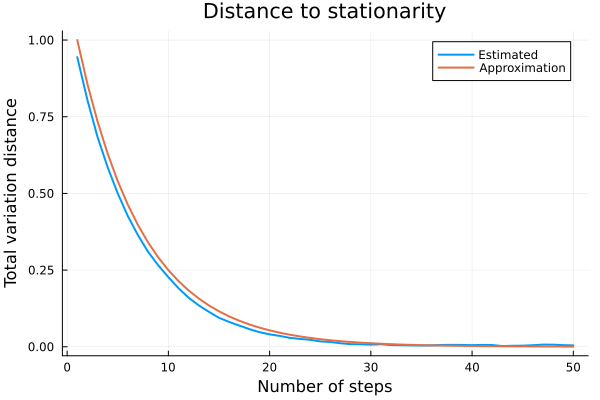

In [139]:
plot(ts, TV, label="Estimated",  linewidth=2)
plot!(1:reps, approx_TV, label="Approximation", linewidth = 2)
xlabel!("Number of steps")
ylabel!("Total variation distance")
title!("Distance to stationarity")